In [2]:
from keras.models import load_model
import csv
import pandas as pd
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import MultipleLocator
import warnings
warnings.filterwarnings("ignore")

In [5]:
# The German Traffic Sign Recognition Benchmark
# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
# grayscale type image can not be shown by plt.imshow function
# image array: for int: [0..255], for float: [0..1]
def readTrafficSigns(rootpath, img_size=(28,28), val_size=0.2, grayscale=True):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    
    Loads an image from file, resize to img_size and return as numpy array.
    Values are normalized to range [0,1].
    :param img: image path
    :param img_size: image size as tuple (width, height)
    :return: ndarray (width, height, 3) or (width, height)
    
    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels
    '''
    
    images_train = [] # images
    images_val = [] # images
    
    labels_train = [] # corresponding labels
    labels_val = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        imglist=[]
        labelist=[]
        
        for row in gtReader:
            img = prefix + row[0]
            if grayscale == True:
                img = load_img(img, target_size=img_size, color_mode='grayscale')
            else:
                img = load_img(img, target_size=img_size, color_mode='rgb')

            img = img_to_array(img)
            img = img/255
            img = img.clip(0, 1)
            img = exposure.equalize_hist(img)
            
            label=int(row[7])
            imglist.append(img)
            labelist.append(label)
            
        X_train, X_val, y_train, y_val = train_test_split(imglist, labelist, test_size=val_size, random_state=42)
        
        images_train.extend(X_train)
        images_val.extend(X_val)
        
        labels_train.extend(y_train)
        labels_val.extend(y_val)
        
        gtFile.close()
    return np.array(images_train), np.array(images_val), labels_train, labels_val

In [6]:
def readTrafficSigns_test(rootpath, img_size=(28,28), grayscale=True):
    images = [] # images
    labels = [] # corresponding labels
    
    gtFile = open(rootpath+"/GT-final_test.csv") # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    next(gtReader) # skip header
    # loop over all images in current annotations file
    for row in gtReader:
        img = rootpath + '/' + row[0]
        if grayscale == True:
            img = load_img(img, target_size=img_size, color_mode='grayscale')
        else:
            img = load_img(img, target_size=img_size, color_mode='rgb')

        img = img_to_array(img)
        img = img/255
        img = img.clip(0, 1)
        img = exposure.equalize_hist(img)

        images.append(img)
        labels.append(int(row[7])) # the 8th column is the label
    gtFile.close()
    return np.array(images), labels

In [16]:
def readTrafficSigns_raw(rootpath, img_size=(32,32), val_size=0.2, grayscale=True):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    
    Loads an image from file, resize to img_size and return as numpy array.
    Values are normalized to range [0,1].
    :param img: image path
    :param img_size: image size as tuple (width, height)
    :return: ndarray (width, height, 3) or (width, height)
    
    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels
    '''
    
    images_train = [] # images
    images_val = [] # images
    
    labels_train = [] # corresponding labels
    labels_val = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        imglist=[]
        labelist=[]
        
        for row in gtReader:
            img = prefix + row[0]
            if grayscale == True:
                img = load_img(img, target_size=img_size, color_mode='grayscale')
            else:
                img = load_img(img, target_size=img_size, color_mode='rgb')

            img = img_to_array(img)
            img = img/255
            img = img.clip(0, 1)
#             img = exposure.equalize_hist(img)
            
            label=int(row[7])
            imglist.append(img)
            labelist.append(label)
            
        X_train, X_val, y_train, y_val = train_test_split(imglist, labelist, test_size=val_size, random_state=42)
        
        images_train.extend(X_train)
        images_val.extend(X_val)
        
        labels_train.extend(y_train)
        labels_val.extend(y_val)
        
        gtFile.close()
    return np.array(images_train), np.array(images_val), labels_train, labels_val

In [7]:
train_path = '../data/GTSRB/Final_Training/Images'
test_path = '../data/GTSRB/Final_Test/Images'

img_size = (32,32)
gray=True
val_size=0.2

X_train, X_val, y_train, y_val = readTrafficSigns(train_path, img_size=img_size, grayscale=gray, val_size=val_size)
X_test, y_test = readTrafficSigns_test(test_path, img_size=img_size, grayscale=gray)

In [17]:
gray=False
rX_train, rX_val, ry_train, ry_val = readTrafficSigns_raw(train_path, img_size=img_size, grayscale=gray, val_size=val_size)

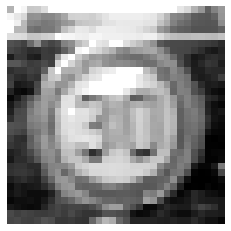

In [39]:
import os

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(array_to_img(X_train[200]), cmap='gray', )
plt.axis('off')
fig_dir = './images'
fig_ext = '.png'
fig.savefig(os.path.join(fig_dir, 'processed_train' + fig_ext))

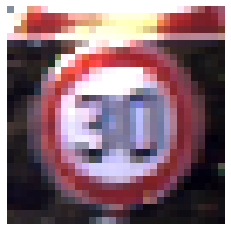

In [40]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(array_to_img(rX_train[200]))
plt.axis('off')
fig_dir = './images'
fig_ext = '.png'
fig.savefig(os.path.join(fig_dir, 'non_processed_train' + fig_ext))

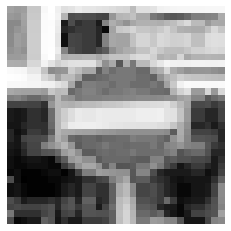

In [41]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(array_to_img(X_val[5000]), cmap='gray')
plt.axis('off')
fig_dir = './images'
fig_ext = '.png'
fig.savefig(os.path.join(fig_dir, 'processed_val' + fig_ext))

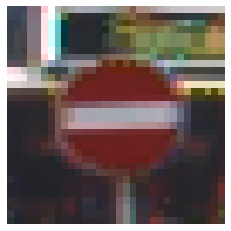

In [42]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(array_to_img(rX_val[5000]))
plt.axis('off')
fig_dir = './images'
fig_ext = '.png'
fig.savefig(os.path.join(fig_dir, 'non_processed_val' + fig_ext))

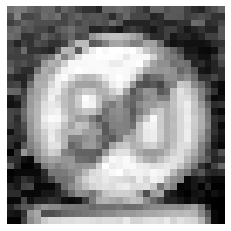

In [43]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(array_to_img(X_val[2000]), cmap='gray')
plt.axis('off')
fig_dir = './images'
fig_ext = '.png'
fig.savefig(os.path.join(fig_dir, 'processed_test' + fig_ext))

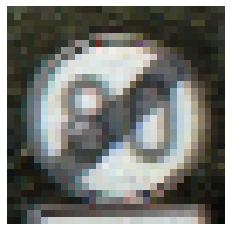

In [44]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(array_to_img(rX_val[2000]))
plt.axis('off')
fig_dir = './images'
fig_ext = '.png'
fig.savefig(os.path.join(fig_dir, 'non_processed_test' + fig_ext))

In [50]:
signnames_file = 'C:/Users/ElementQi/Desktop/dataScienceProgramming/pythonProject/data/GTSRB/signnames.csv'
with open(signnames_file) as f:
    f.readline() # Strip the header
    tuples = [line.strip().split(',') for line in f]
    sign_names = {int(t[0]): t[1] for t in tuples}

In [51]:
sign_names

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vechiles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vechiles',
 16: 'Vechiles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [46]:
model = load_model('weights22.best.hdf5')

In [49]:
model.predict_classes(X_val[1999:2001])

array([6, 6], dtype=int64)

In [57]:
img_path = '20.png'
img = load_img(img_path, target_size=(32,32), color_mode='grayscale')

img = img_to_array(img)
img = img/255
img = img.clip(0, 1)
img = exposure.equalize_hist(img)

# label=int(row[7])
# imglist.append(img)
# labelist.append(label)

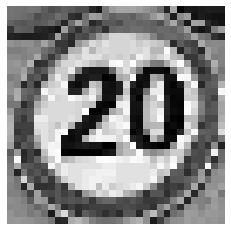

In [60]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(array_to_img(img), cmap='gray')
plt.axis('off')
fig_dir = './images'
fig_ext = '.png'
fig.savefig(os.path.join(fig_dir, 'processed_real' + fig_ext))

In [58]:
model.predict_classes(np.array([img]))

array([0], dtype=int64)

In [61]:
model.predict_proba(np.array([img]))

array([[9.8923045e-01, 1.5674975e-07, 7.0385108e-12, 3.0182657e-05,
        3.2231716e-16, 6.6401259e-12, 1.2940328e-10, 2.0631902e-21,
        7.6508849e-10, 1.7904546e-12, 9.4161515e-14, 6.2012928e-09,
        2.6244756e-13, 8.1948709e-18, 1.8861422e-10, 2.8163416e-11,
        2.0489070e-07, 5.7602203e-13, 4.6559805e-08, 4.6414140e-11,
        4.0964804e-14, 1.3425783e-15, 5.5191559e-12, 2.5190414e-10,
        3.5043101e-12, 7.8570437e-16, 1.2381696e-12, 1.2463529e-13,
        1.1173687e-05, 8.3375051e-07, 8.2041731e-15, 1.0726848e-02,
        5.9787307e-11, 3.1147060e-12, 5.4342997e-10, 1.1521628e-09,
        2.0443577e-12, 6.8561484e-08, 3.9319016e-08, 3.2843857e-09,
        2.2652172e-08, 9.2686428e-15, 9.1403339e-17]], dtype=float32)

In [ ]:
Most probable class: Speed limit (20km/h)
Probability: 9.8923045e-01.

In [53]:
img

array([[[0.88470019],
        [0.88470019],
        [0.94726562],
        ...,
        [0.88470019],
        [0.88470019],
        [0.73948901]],

       [[0.73948901],
        [0.88470019],
        [0.88470019],
        ...,
        [0.88470019],
        [0.67578125],
        [0.73948901]],

       [[0.67578125],
        [0.73948901],
        [0.73948901],
        ...,
        [0.73948901],
        [0.73948901],
        [0.67578125]],

       ...,

       [[0.88470019],
        [0.88470019],
        [0.73948901],
        ...,
        [0.53378705],
        [0.53378705],
        [0.53378705]],

       [[0.67578125],
        [0.88470019],
        [0.73948901],
        ...,
        [0.50289937],
        [0.50289937],
        [0.53378705]],

       [[0.73948901],
        [0.67578125],
        [0.67578125],
        ...,
        [0.50289937],
        [0.50289937],
        [0.50289937]]])